In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("cleaned_BlinkIT_Grocery_Data.xlsx")
# Check if the data loaded correctly
data.head()


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


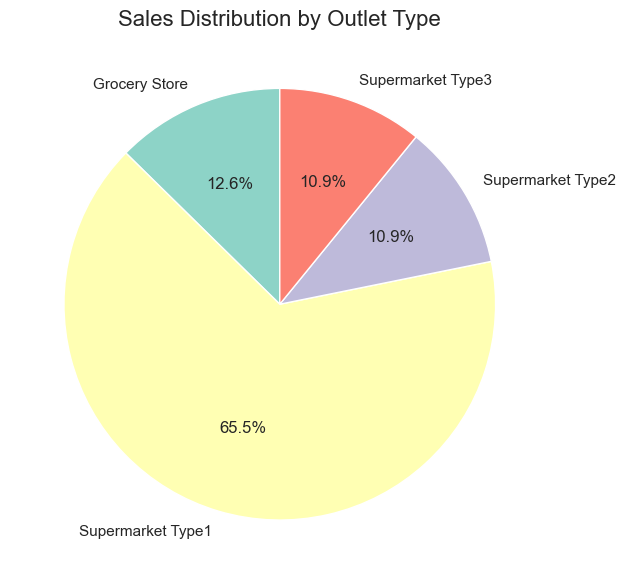

In [14]:
# Pie Chart: Sales by Outlet Type
sales_by_outlet_type = data.groupby('Outlet Type')['Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(sales_by_outlet_type, labels=sales_by_outlet_type.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Sales Distribution by Outlet Type', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\abhis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


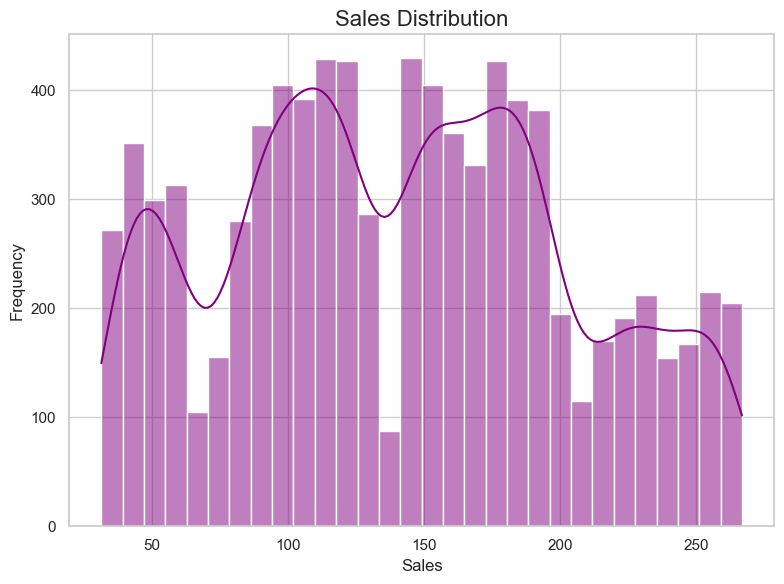

In [15]:
# Histogram: Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Sales'], bins=30, kde=True, color='purple')
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


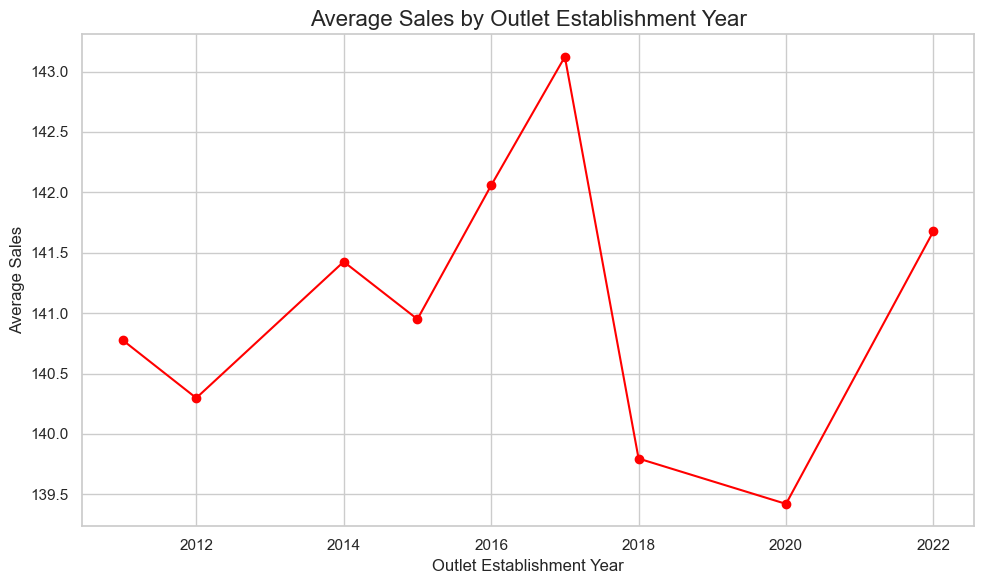

In [16]:
# Line Plot: Sales by Outlet Establishment Year
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].mean()
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='line', marker='o', color='red')
plt.title('Average Sales by Outlet Establishment Year', fontsize=16)
plt.xlabel('Outlet Establishment Year', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


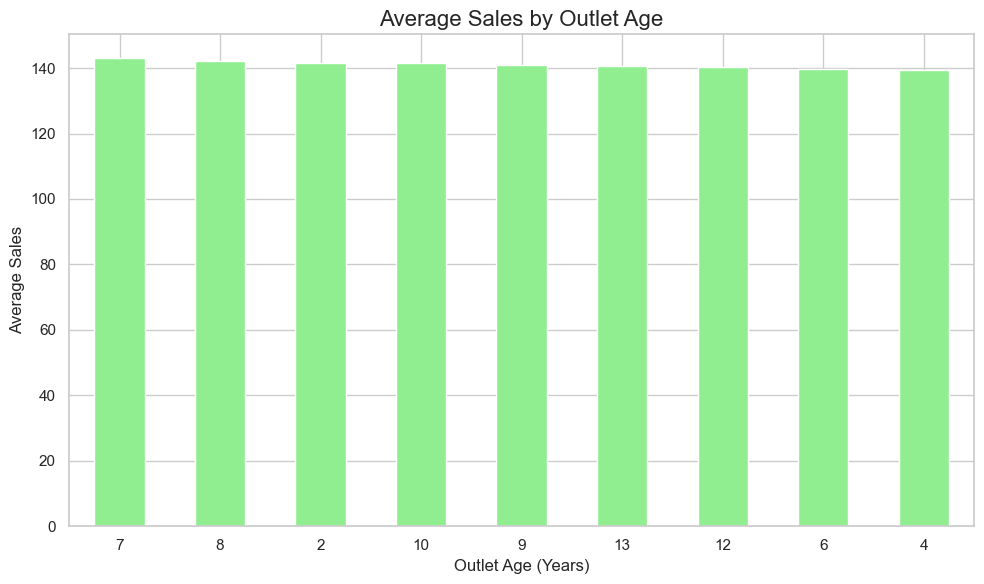

In [19]:
def sales_by_outlet_age(data):
    # Calculate the outlet age
    current_year = pd.Timestamp.now().year
    data['Outlet Age'] = current_year - data['Outlet Establishment Year']

    # Group by outlet age and calculate average sales
    avg_sales_by_age = data.groupby('Outlet Age')['Sales'].mean().sort_values(ascending=False)

    # Plot the results
    plt.figure(figsize=(10, 6))
    avg_sales_by_age.plot(kind='bar', color='lightgreen')
    plt.title('Average Sales by Outlet Age', fontsize=16)
    plt.xlabel('Outlet Age (Years)', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Call the function
sales_by_outlet_age(data)


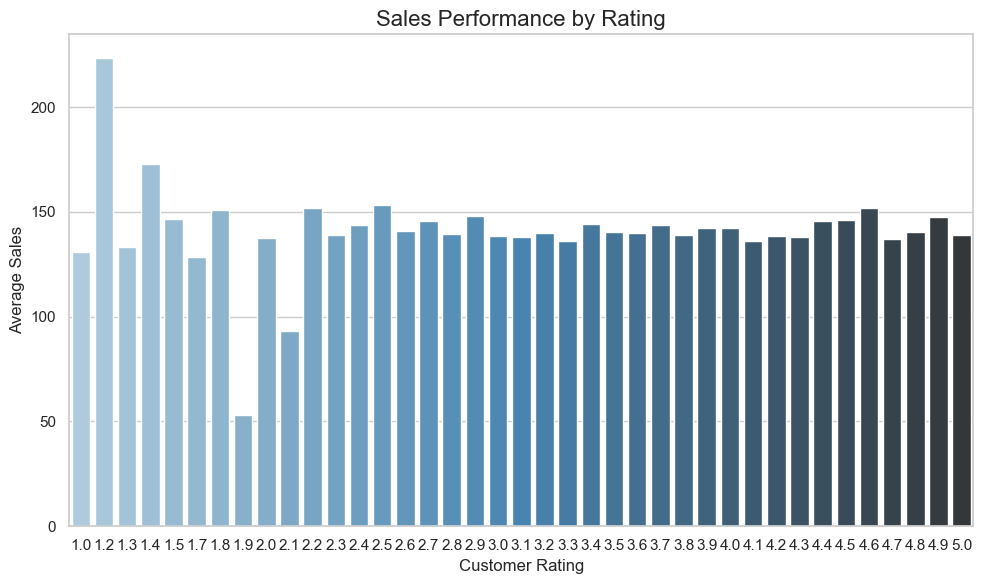

In [21]:
def rating_vs_sales(data):
    # Group by Rating to analyze average sales
    sales_by_rating = data.groupby('Rating')['Sales'].mean().sort_values(ascending=False)

    # Plot the results
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sales_by_rating.index, y=sales_by_rating, palette='Blues_d')
    plt.title('Sales Performance by Rating', fontsize=16)
    plt.xlabel('Customer Rating', fontsize=12)
    plt.ylabel('Average Sales', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
rating_vs_sales(data)


In [22]:
def high_visibility_low_sales(data, visibility_threshold=0.1, sales_threshold=100):
    # Filter items with high visibility but low sales
    filtered_data = data[(data['Item Visibility'] > visibility_threshold) & (data['Sales'] < sales_threshold)]

    # Display top 10 items based on visibility
    top_items = filtered_data[['Item Identifier', 'Item Visibility', 'Sales']].sort_values(by='Item Visibility', ascending=False).head(10)

    print(top_items)

# Call the function
high_visibility_low_sales(data)


     Item Identifier  Item Visibility    Sales
7669           FDT24         0.311090  79.2328
7638           NCE31         0.309390  33.2216
6450           FDR14         0.304737  54.7298
3900           DRH23         0.298205  55.7614
4620           FDL16         0.294939  47.1060
7708           FDU27         0.287017  48.8376
7672           FDQ47         0.281510  33.8874
2144           FDE56         0.278731  63.2194
1728           FDR43         0.270300  38.3190
1177           FDV28         0.267353  34.9558


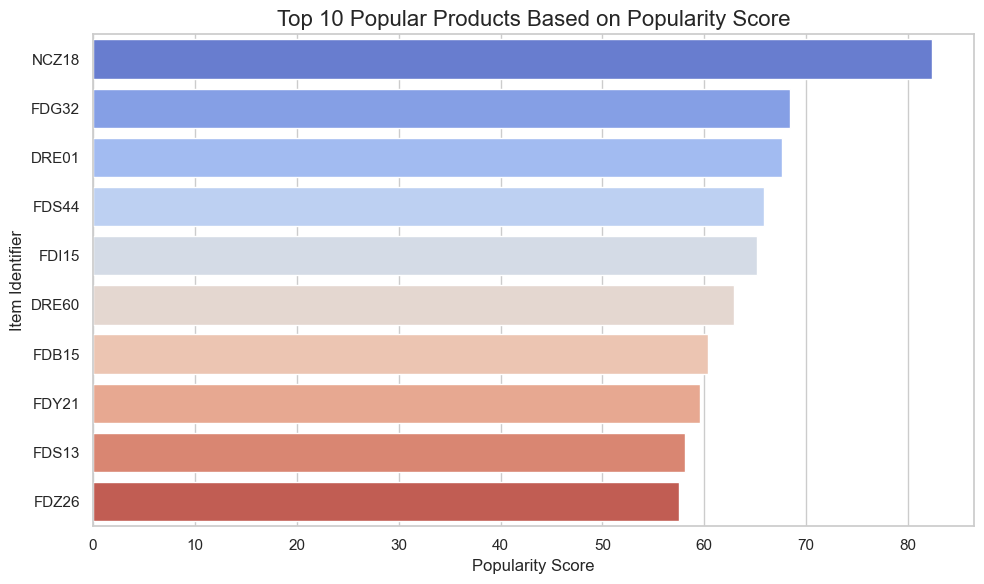

In [24]:
def product_popularity_score(data):
    # Create a popularity score: Sales * Visibility
    data['Popularity Score'] = data['Sales'] * data['Item Visibility']

    # Get top 10 most popular products
    top_popular_products = data[['Item Identifier', 'Popularity Score']].sort_values(by='Popularity Score', ascending=False).head(10)

    # Plot the results
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Popularity Score', y='Item Identifier', data=top_popular_products, palette='coolwarm')
    plt.title('Top 10 Popular Products Based on Popularity Score', fontsize=16)
    plt.xlabel('Popularity Score', fontsize=12)
    plt.ylabel('Item Identifier', fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function
product_popularity_score(data)


In [4]:
def compare_item_type_ratings(dataframe):
    """
    This function compares the ratings of different item types and returns a summary
    of average, minimum, and maximum ratings for each item type.
    
    Args:
    dataframe (pd.DataFrame): The DataFrame containing item data with "Item Type" and "Rating" columns.

    Returns:
    pd.DataFrame: A summary DataFrame with Item Type, average rating, min rating, and max rating.
    """
    rating_summary = dataframe.groupby('Item Type')['Rating'].agg(['mean', 'min', 'max']).reset_index()
    rating_summary.columns = ['Item Type', 'Average Rating', 'Min Rating', 'Max Rating']
    
    return rating_summary

# Applying the function to the dataset
compare_item_type_ratings(data)


,Item Type,Average Rating,Min Rating,Max Rating
0,Baking Goods,3.983025,1.0,5.0
1,Breads,3.881275,1.0,5.0
2,Breakfast,3.932727,1.0,5.0
3,Canned,3.994299,1.0,5.0
4,Dairy,3.965836,1.0,5.0
5,Frozen Foods,3.971145,1.0,5.0
6,Fruits and Vegetables,3.956169,1.0,5.0
7,Hard Drinks,3.907477,1.0,5.0
8,Health and Hygiene,3.986154,1.0,5.0
9,Household,3.998681,1.0,5.0


In [22]:


def analyze_item_type_outlet_size_bar_chart(file_path):
    """
    Function to analyze 'Item Type' and 'Outlet Size' and create a bar chart visualization.

    Parameters:
    - file_path: str : Path to the Excel file to analyze.

    Returns:
    - Displays a bar chart showing the distribution of 'Item Type' vs 'Outlet Size'.
    """


    # Check if the necessary columns exist in the dataset
    if 'Item Type' not in data.columns or 'Outlet Size' not in data.columns:
        raise ValueError("The dataset must contain 'Item Type' and 'Outlet Size' columns.")

    # Count the number of occurrences of each 'Item Type' and 'Outlet Size' combination
    grouped_data = data.groupby(['Item Type', 'Outlet Size']).size().reset_index(name='Count')

    # Create a bar plot for 'Item Type' vs 'Outlet Size'
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Item Type', y='Count', hue='Outlet Size', data=grouped_data, palette='Set2')

    # Add title and labels
    plt.title('Distribution of Item Type by Outlet Size', fontsize=16)
    plt.xlabel('Item Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()


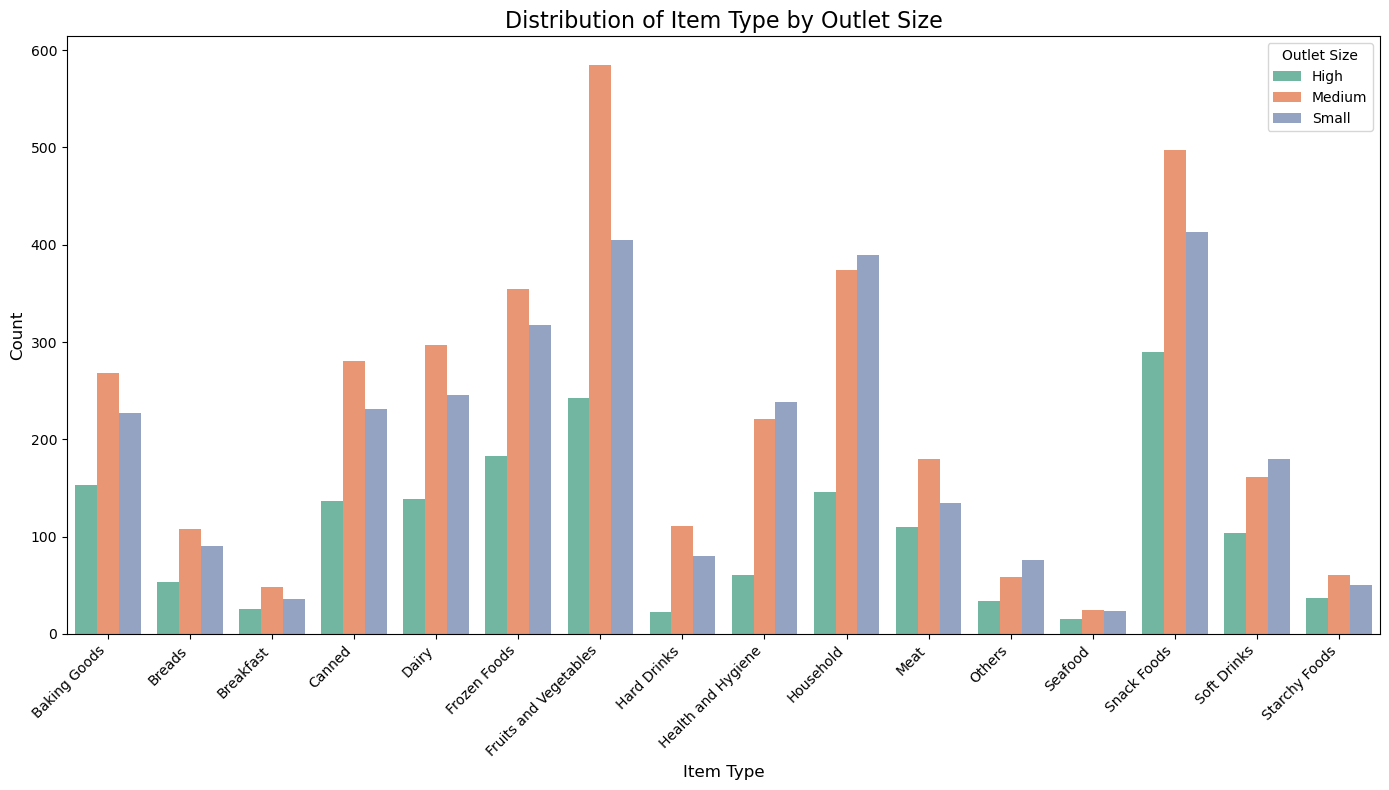

In [24]:
file_path = "C:/Users/abhis/Downloads/BlinkIT Grocery Data.xlsx"  # Replace with the actual file path
analyze_item_type_outlet_size_bar_chart("C:/Users/abhis/Downloads/BlinkIT Grocery Data.xlsx" )



In [1]:
file_path = "C:/Users/abhis/Downloads/BlinkIT Grocery Data.xlsx" 
analyze_items_by_weight("C:/Users/abhis/Downloads/BlinkIT Grocery Data.xlsx")


NameError: name 'analyze_items_by_weight' is not defined

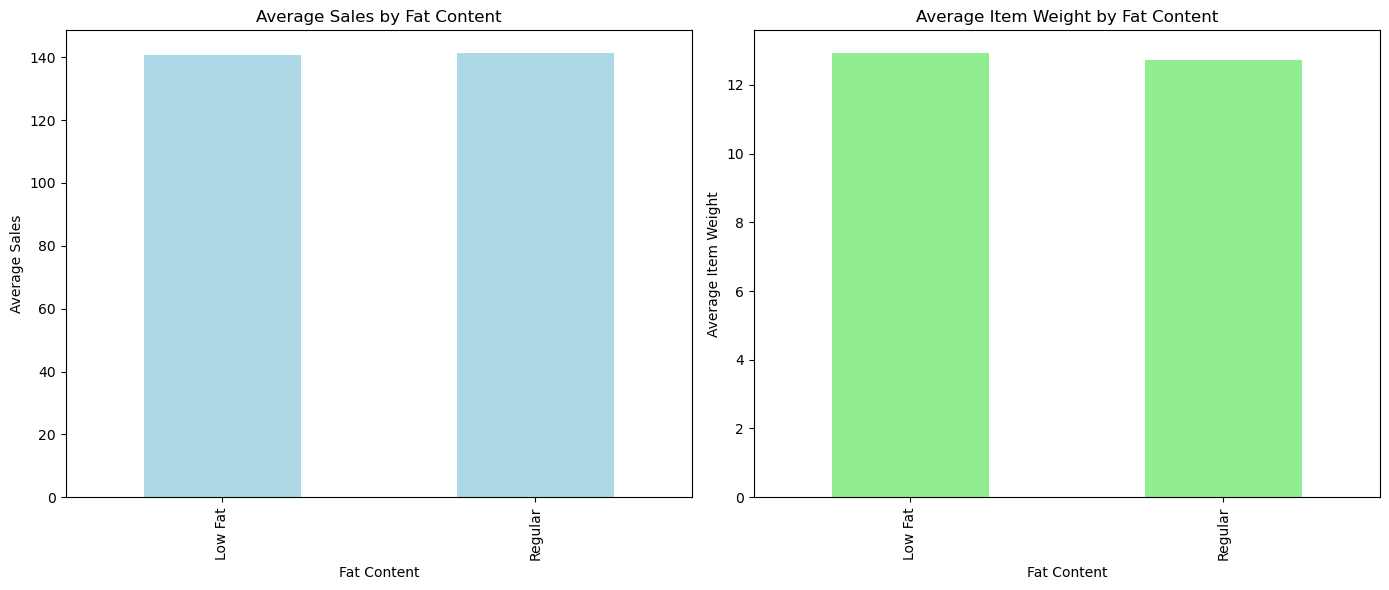

In [5]:
def fat_content_impact(data):
    # Calculate average sales and item weight based on fat content
    avg_sales_weight = data.groupby('Item Fat Content').agg({
        'Sales': 'mean',
        'Item Weight': 'mean'
    })

    # Plot the results
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for Sales
    avg_sales_weight['Sales'].plot(kind='bar', ax=ax[0], color='lightblue')
    ax[0].set_title('Average Sales by Fat Content')
    ax[0].set_xlabel('Fat Content')
    ax[0].set_ylabel('Average Sales')

    # Plot for Item Weight
    avg_sales_weight['Item Weight'].plot(kind='bar', ax=ax[1], color='lightgreen')
    ax[1].set_title('Average Item Weight by Fat Content')
    ax[1].set_xlabel('Fat Content')
    ax[1].set_ylabel('Average Item Weight')

    plt.tight_layout()
    plt.show()

# Call the function
fat_content_impact(data)


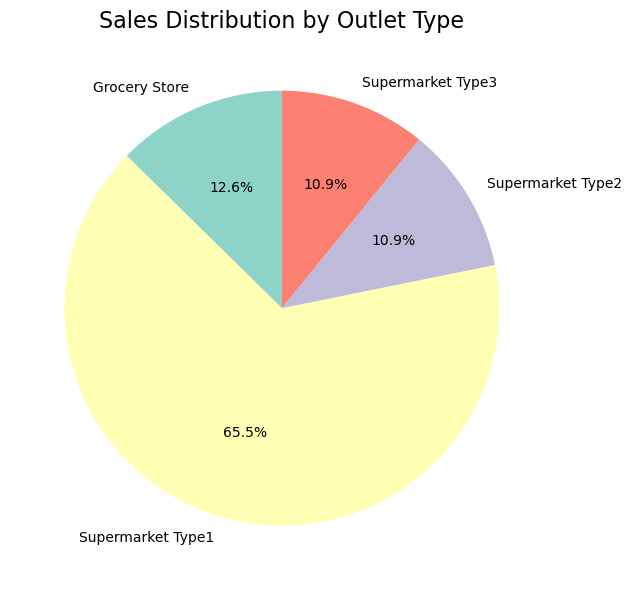

In [6]:
sales_by_outlet_type = data.groupby('Outlet Type')['Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(sales_by_outlet_type, labels=sales_by_outlet_type.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Sales Distribution by Outlet Type', fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
# 1. Group data by Outlet Location Type and Item Type to get the total sales for each group
sales_summary = data.groupby(['Outlet Location Type', 'Item Type']).agg({'Sales': 'sum'}).reset_index()

# 2. Find the top-selling item for each outlet location type
top_selling_by_location = sales_summary.loc[sales_summary.groupby('Outlet Location Type')['Sales'].idxmax()]

# 3. Find the overall top-selling items across all locations
overall_top_selling = data.groupby('Item Type').agg({'Sales': 'sum'}).sort_values(by='Sales', ascending=False).head()

# Display the results
print("Top-Selling Item in Each Outlet Location Type:")
print(top_selling_by_location)

print("\nOverall Top-Selling Items:")
print(overall_top_selling)


Top-Selling Item in Each Outlet Location Type:
   Outlet Location Type              Item Type       Sales
6                Tier 1  Fruits and Vegetables  50125.9924
29               Tier 2            Snack Foods  57930.7072
38               Tier 3  Fruits and Vegetables  70729.7094

Overall Top-Selling Items:
                             Sales
Item Type                         
Fruits and Vegetables  178124.0810
Snack Foods            175433.9224
Household              135976.5254
Frozen Foods           118558.8814
Dairy                  101276.4616


In [11]:

# 1. Group data by Outlet Size and Item Type to get total sales for each group
sales_summary = data.groupby(['Outlet Size', 'Item Type']).agg({'Sales': 'sum'}).reset_index()

# 2. Sort each Outlet Size group by sales and take the top 5 item types for each group
top_5_by_outlet_size = sales_summary.groupby('Outlet Size').apply(lambda x: x.nlargest(5, 'Sales')).reset_index(drop=True)

# 3. Sort the data for each outlet size for a clear output
top_5_by_outlet_size = top_5_by_outlet_size.sort_values(by=['Outlet Size', 'Sales'], ascending=[True, False])

# Display the results
print("Top 5 Selling Item Types for Each Outlet Size:")
print(top_5_by_outlet_size)


Top 5 Selling Item Types for Each Outlet Size:
   Outlet Size              Item Type       Sales
0         High            Snack Foods  42335.3804
1         High  Fruits and Vegetables  34833.2214
2         High           Frozen Foods  24986.2550
3         High              Household  21185.0270
4         High                  Dairy  21092.5046
5       Medium  Fruits and Vegetables  83569.8074
6       Medium            Snack Foods  72194.4584
7       Medium              Household  55438.9522
8       Medium           Frozen Foods  50019.6094
9       Medium                  Dairy  44507.9662
10       Small            Snack Foods  60904.0836
11       Small  Fruits and Vegetables  59721.0522
12       Small              Household  59352.5462
13       Small           Frozen Foods  43553.0170
14       Small                  Dairy  35675.9908


   Outlet Establishment Year  Outlet Count
0                       2011           555
1                       2012           930
2                       2014           932
3                       2015           929
4                       2016           930
5                       2017           930
6                       2018          1463
7                       2020           926
8                       2022           928


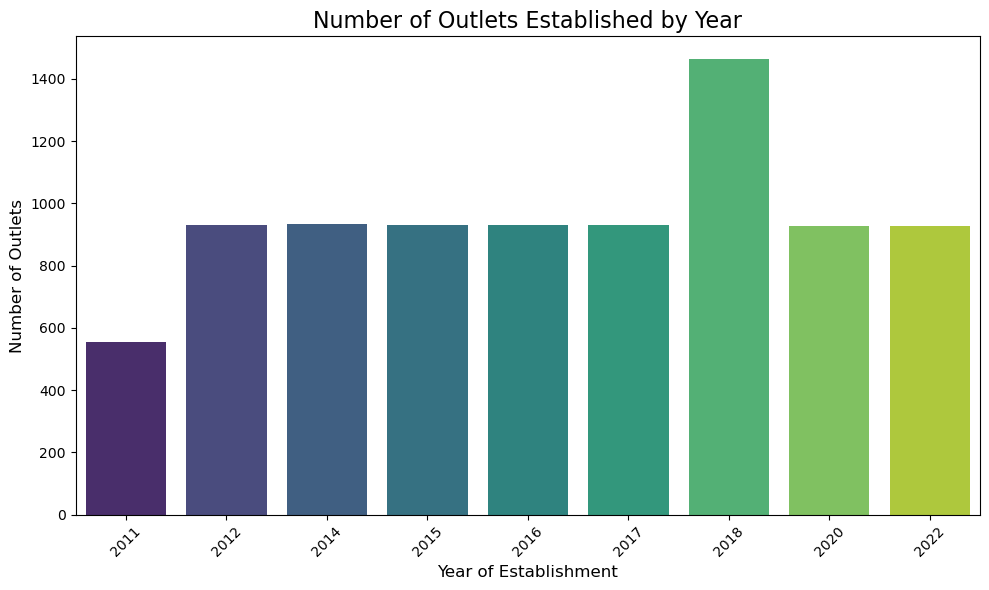

In [13]:


outlet_establishment_summary = data.groupby(['Outlet Establishment Year', 'Outlet Size', 'Outlet Type', 'Outlet Location Type']).size().reset_index(name='Outlet Count')

# 2. Count how many outlets were established per year
outlet_count_per_year = data.groupby('Outlet Establishment Year').size().reset_index(name='Outlet Count')

# Display the counts for each year
print(outlet_count_per_year)

# 3. Create a bar chart to visualize how many outlets were established each year
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet Establishment Year', y='Outlet Count', data=outlet_count_per_year, palette='viridis')

# Add titles and labels
plt.title('Number of Outlets Established by Year', fontsize=16)
plt.xlabel('Year of Establishment', fontsize=12)
plt.ylabel('Number of Outlets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


         Outlet Type  Outlet Count
0      Grocery Store          1083
1  Supermarket Type1          5577
2  Supermarket Type2           928
3  Supermarket Type3           935


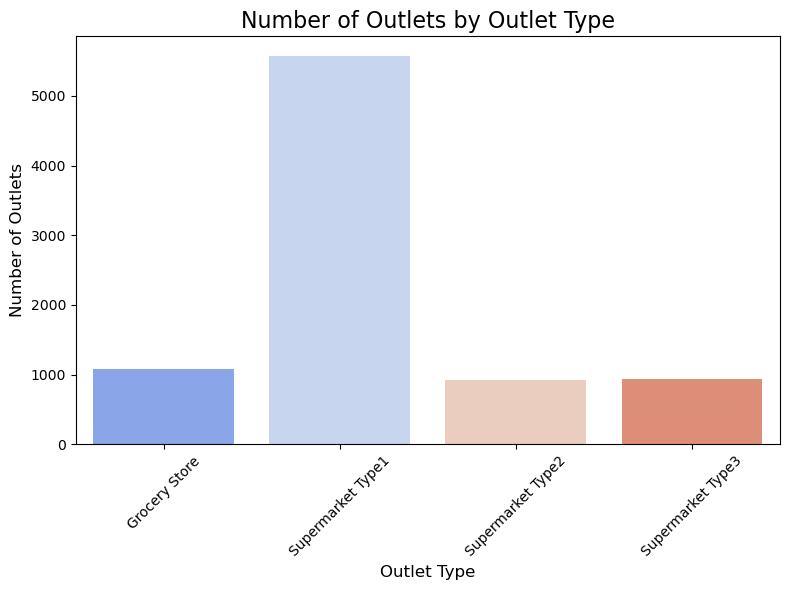

In [14]:

# 1. Count the number of outlets by 'Outlet Type'
outlet_type_count = data.groupby('Outlet Type').size().reset_index(name='Outlet Count')

# Display the counts for each outlet type
print(outlet_type_count)


plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet Type', y='Outlet Count', data=outlet_type_count, palette='coolwarm')


plt.title('Number of Outlets by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Number of Outlets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

         Outlet Type        Sales              Item Type
0      Grocery Store  151939.1490  Fruits and Vegetables
1  Supermarket Type1  787549.8928  Fruits and Vegetables
2  Supermarket Type2  131477.7764            Snack Foods
3  Supermarket Type3  130714.6746  Fruits and Vegetables


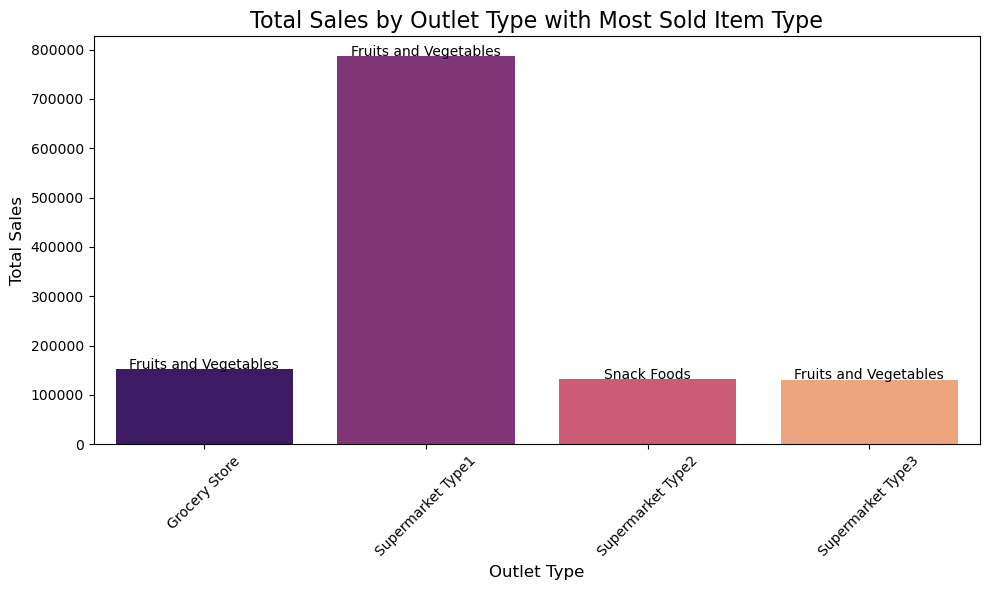

In [15]:

# 1. Group by 'Outlet Type' and sum the sales for each type
sales_by_outlet_type = data.groupby('Outlet Type').agg({'Sales': 'sum'}).reset_index()


most_sold_item_by_outlet = data.groupby(['Outlet Type', 'Item Type']).agg({'Sales': 'sum'}).reset_index()
most_sold_item_by_outlet = most_sold_item_by_outlet.loc[most_sold_item_by_outlet.groupby('Outlet Type')['Sales'].idxmax()]

# Merge both datasets to have total sales and most sold item in one DataFrame
sales_by_outlet_type = sales_by_outlet_type.merge(most_sold_item_by_outlet[['Outlet Type', 'Item Type']], on='Outlet Type')

# Display the merged data
print(sales_by_outlet_type)

# 3. Create a bar chart to visualize sales by outlet type and annotate the most sold item type
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Outlet Type', y='Sales', data=sales_by_outlet_type, palette='magma')


for index, row in sales_by_outlet_type.iterrows():
    barplot.text(index, row['Sales'] + 500, row['Item Type'], color='black', ha="center", fontsize=10)


plt.title('Total Sales by Outlet Type with Most Sold Item Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [16]:

# 2. Count of Items by 'Fat Content' for each 'Item Type'
fat_content_count = data.groupby(['Item Type', 'Item Fat Content']).size().reset_index(name='Count')
print("Count of Items by Fat Content for each Item Type:")
print(fat_content_count)

# 3. Average Sales by 'Fat Content' for each 'Item Type'
avg_sales_by_fat_content = data.groupby(['Item Type', 'Item Fat Content']).agg({'Sales': 'mean'}).reset_index()
print("\nAverage Sales by Fat Content for each Item Type:")
print(avg_sales_by_fat_content)

# 4. Total Sales by 'Fat Content' for each 'Item Type'
total_sales_by_fat_content = data.groupby(['Item Type', 'Item Fat Content']).agg({'Sales': 'sum'}).reset_index()
print("\nTotal Sales by Fat Content for each Item Type:")
print(total_sales_by_fat_content)


Count of Items by Fat Content for each Item Type:
                Item Type Item Fat Content  Count
0            Baking Goods          Low Fat    329
1            Baking Goods          Regular    319
2                  Breads          Low Fat    140
3                  Breads          Regular    111
4               Breakfast          Low Fat     41
5               Breakfast          Regular     69
6                  Canned          Low Fat    341
7                  Canned          Regular    308
8                   Dairy          Low Fat    418
9                   Dairy          Regular    264
10           Frozen Foods          Low Fat    450
11           Frozen Foods          Regular    406
12  Fruits and Vegetables          Low Fat    630
13  Fruits and Vegetables          Regular    602
14            Hard Drinks          Low Fat    214
15     Health and Hygiene          Low Fat    520
16              Household          Low Fat    910
17                   Meat          Low Fat    170


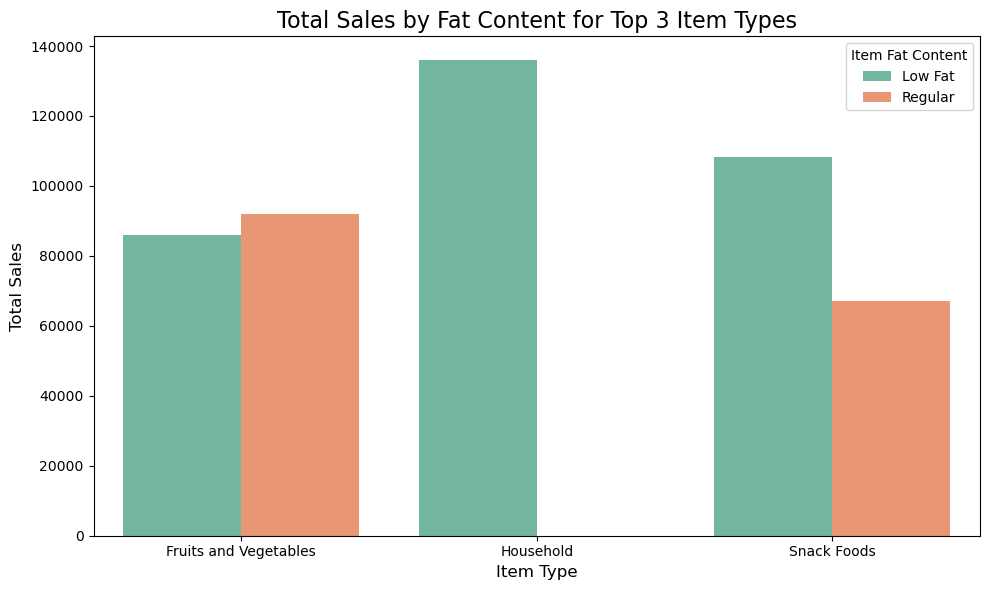

In [17]:

# 2. Group the data by 'Item Type' and 'Fat Content', calculate total sales
total_sales_by_fat_content = data.groupby(['Item Type', 'Item Fat Content']).agg({'Sales': 'sum'}).reset_index()

# 3. Find the top 3 Item Types based on total sales
top_item_types = total_sales_by_fat_content.groupby('Item Type')['Sales'].sum().nlargest(3).index

# 4. Filter the data to include only the top 3 Item Types
filtered_sales_data = total_sales_by_fat_content[total_sales_by_fat_content['Item Type'].isin(top_item_types)]

# 5. Plot a bar chart comparing total sales by Fat Content for the top 3 Item Types
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Sales', hue='Item Fat Content', data=filtered_sales_data, palette='Set2')

plt.title('Total Sales by Fat Content for Top 3 Item Types', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
# Group ratings into bins and calculate total sales for each rating group
rating_bins = pd.cut(data['Rating'], bins=[1, 2, 3, 4, 5], right=False, labels=['1 to 2', '2 to 3', '3 to 4', '4 to 5'])
data['Rating Group'] = rating_bins


sales_by_rating_group = data.groupby('Rating Group')['Sales'].sum()

sales_by_rating_group

C:\Users\abhis\AppData\Local\Temp\ipykernel_12764\2155188579.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_rating_group = data.groupby('Rating Group')['Sales'].sum()


Rating Group
1 to 2     19093.5092
2 to 3     39909.7866
3 to 4    223110.6118
4 to 5    860285.0428
Name: Sales, dtype: float64

C:\Users\abhis\AppData\Local\Temp\ipykernel_12764\242447285.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_rating_group = data.groupby('Rating Group')['Sales'].sum()


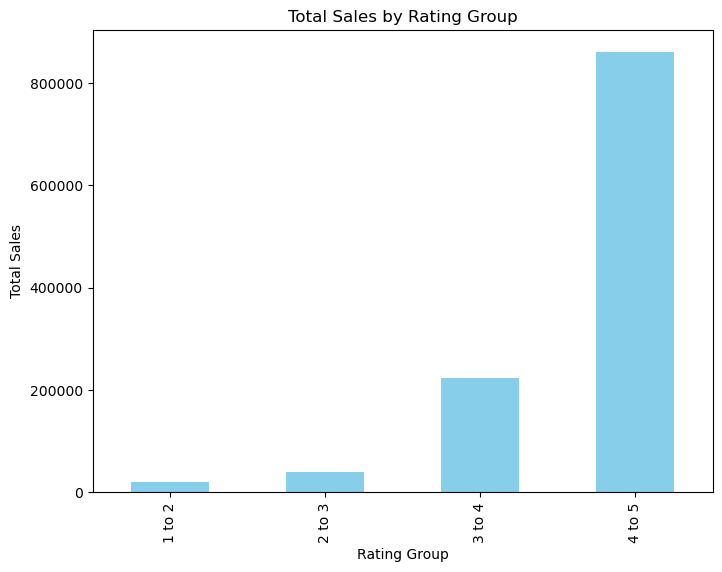

In [22]:


# Group ratings into bins
rating_bins = pd.cut(data['Rating'], bins=[1, 2, 3, 4, 5], right=False, labels=['1 to 2', '2 to 3', '3 to 4', '4 to 5'])
data['Rating Group'] = rating_bins

# Calculate total sales for each rating group
sales_by_rating_group = data.groupby('Rating Group')['Sales'].sum()

# Plot the bar chart
plt.figure(figsize=(8,6))
sales_by_rating_group.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Rating Group')
plt.xlabel('Rating Group')
plt.ylabel('Total Sales')
plt.show()


C:\Users\abhis\AppData\Local\Temp\ipykernel_12764\2028725965.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fat_content_sales_by_rating = data.groupby(['Item Fat Content', 'Rating Group'])['Sales'].sum().unstack()


<Figure size 1000x600 with 0 Axes>

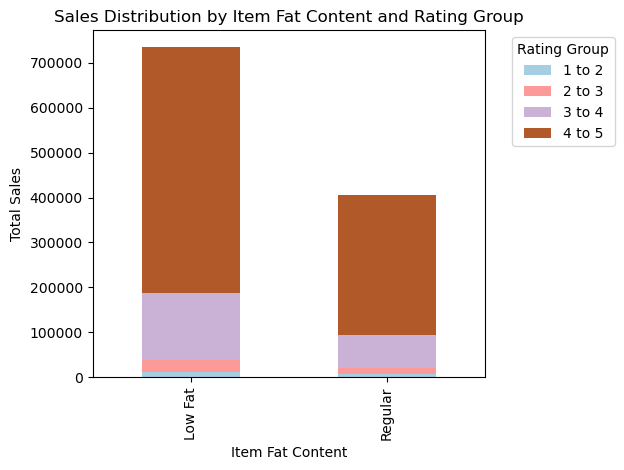

In [25]:

# Group by Item Fat Content and Rating Group to analyze the relationship between fat content and ratings
fat_content_sales_by_rating = data.groupby(['Item Fat Content', 'Rating Group'])['Sales'].sum().unstack()

# Plotting the chart to visualize the relationship
plt.figure(figsize=(10,6))
fat_content_sales_by_rating.plot(kind='bar', stacked=True, colormap='Paired')

plt.title('Sales Distribution by Item Fat Content and Rating Group')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.legend(title='Rating Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
